<a href="https://colab.research.google.com/github/JERSONMALDONA/senales-y-sistemas/blob/main/taler_2/Transformadas_de_Fourier_consulta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Consulta:**

Explique las semejanzas y diferencias entre la **serie de Fourier** (exponencial, trigonométrica y compacta), la **transformada de Fourier**, **transformada de Fourier en tiempo discreto (DTFT)** y **transformada discreta de Fourier (DFT)**.

Considere las diferentes combinaciones entre:

- **Espectro continuo vs espectro discreto**
- **Señal en tiempo continuo vs señal en tiempo discreto**

Además, consulte en qué consiste el algoritmo **Fast Fourier Transform (FFT)** y su utilidad para el cálculo de la **transformada discreta de Fourier**.

Explique en detalle el algoritmo **FFT** y su **costo computacional** comparado con el de la **transformada discreta de Fourier (DFT)**.

Ver cuaderno: *Transformada de Fourier*.


SOLUCION

 **1. Serie de Fourier (Tiempo continuo y periódica)**
# **a) Forma trigonométrica**
Representa una señal periódica $x(t)$ de periodo $T$ como suma de senos y cosenos:

$$
x(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{2\pi n}{T} t\right) + b_n \sin\left(\frac{2\pi n}{T} t\right) \right]
$$

**Coeficientes:**

$$
a_0 = \frac{1}{T} \int_0^T x(t)\,dt
$$

$$
a_n = \frac{2}{T} \int_0^T x(t) \cos\left(\frac{2\pi n}{T}t\right) dt
$$

$$
b_n = \frac{2}{T} \int_0^T x(t) \sin\left(\frac{2\pi n}{T}t\right) dt
$$


**Aplicación:** útil para análisis cuando el comportamiento seno-coseno es más intuitivo, como en circuitos eléctricos o vibraciones.

# **b) Forma exponencial**

Usa funciones exponenciales complejas $e^{j\omega t}$ como base ortonormal:

$$
x(t) = \sum_{n=-\infty}^{\infty} C_n \, e^{j n \omega_0 t} \quad \text{con } \omega_0 = \frac{2\pi}{T}
$$

**Coeficientes:**

$$
C_n = \frac{1}{T} \int_0^T x(t) \, e^{-j n \omega_0 t} \, dt
$$

**Ventaja:** forma compacta, elegante y útil para derivaciones usando álgebra compleja (por ejemplo, convolución, modulación).

# **c) Forma compacta**

Es simplemente la misma serie exponencial, pero reorganizada como:

$$
x(t) = \sum_{n=-\infty}^{\infty} C_n \, e^{j n \omega_0 t} \quad \text{con } C_{-n} = C_n^*
$$

Se llama **compacta** porque encapsula la misma información de la forma trigonométrica, pero con menos notación.

# **2. Transformada de Fourier (Tiempo continuo y no periódica)**
Transforma señales **no periódicas** en tiempo continuo en un **espectro continuo** en frecuencia.

**Transformada directa:**

$$
X(\omega) = \int_{-\infty}^{\infty} x(t)\, e^{-j \omega t} \, dt
$$

**Transformada inversa:**

$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)\, e^{j \omega t} \, d\omega
$$

**Relación con la serie:** si $x(t)$ es periódica, su transformada se convierte en una serie de impulsos (tipo peine de Dirac).

# **3. DTFT – Transformada de Fourier en tiempo discreto**

Se usa para **señales infinitas** en tiempo discreto.  
El espectro resultante es **continuo y periódico** en $\omega$ con periodo $2\pi$.

**Transformada directa:**

$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n]\, e^{-j \omega n}
$$

**Transformada inversa:**

$$
x[n] = \frac{1}{2\pi} \int_{-\pi}^{\pi} X(e^{j\omega})\, e^{j \omega n} \, d\omega
$$

# **4. DFT – Transformada Discreta de Fourier**

Se aplica sobre una señal **discreta y de duración finita** (por ejemplo, una ventana de $N$ muestras).

**Transformada directa:**

$$
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2\pi}{N}kn} \quad \text{para } k = 0, 1, \dots, N-1
$$

**Transformada inversa:**

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \, e^{j \frac{2\pi}{N}kn} \quad \text{para } n = 0, 1, \dots, N-1
$$

Se puede ver como un **muestreo periódico de la DTFT**.

Es la base de la implementación numérica mediante **FFT (Fast Fourier Transform)**.


EJEMPLO EN PYTHON FFT


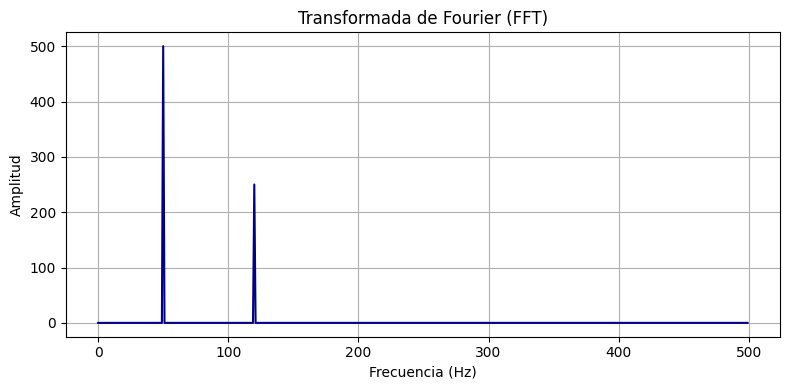

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
muestreo = 1000  # Hz
duracion = 1     # segundos
N = int(muestreo * duracion)
tiempo = np.linspace(0, duracion, N, endpoint=False)

# Señal compuesta: dos senoidales
senal = np.sin(2 * np.pi * 50 * tiempo) + 0.5 * np.sin(2 * np.pi * 120 * tiempo)

# Transformada rápida de Fourier (FFT)
transformada = np.fft.fft(senal)
frecuencias = np.fft.fftfreq(N, d=1/muestreo)

# Gráfica del espectro (solo mitad positiva)
mitad = N // 2
plt.figure(figsize=(8, 4))
plt.plot(frecuencias[:mitad], np.abs(transformada[:mitad]), color='darkblue')
plt.title("Transformada de Fourier (FFT)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()


#Conclusiones

| Transformada | Tipo de señal | Dominio del tiempo | Tipo de espectro      |
| ------------ | ------------- | ------------------ | --------------------- |
| SF           | Periódica     | Continuo           | Discreto              |
| TF           | No periódica  | Continuo           | Continuo              |
| DTFT         | No periódica  | Discreto           | Continuo y periódico  |
| DFT          | Periódica     | Discreto           | Discreto y periódico  |
| FFT          | Periódica     | Discreto           | Discreto (optimizado) |
